# JSC270 - Class \#3

## Prof. Chevalier

# Today's Class

- Descriptive statistics:
    - mean, median, mode
    - variance, standard deviation
    - frequency distribution

- Data visualization:
   - visual summary
   - distributions
   - relationships

<center>
    <h3> https://jsc270.github.io/simple_page.html </h3>
    <br />

    <img src="img/simple_html.png" style='border:1px solid #000000' width="600"></img>
</center>

# html

#### Exercise: Scrape the data using BeautifulSoup

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

webpage = 'https://jsc270.github.io/simple_page.html'
page = urlopen(webpage)
soup = BeautifulSoup(page, 'html.parser')

# select all <td> tag elements within <tr> within <tbdoy> 
# https://www.w3schools.com/cssref/css_selectors.asp 
tabledata=soup.select('tbody tr td')

# extract text part of tag using list comprehension
tabletext = [m.get_text() for m in tabledata] 

# keep only the relevant data
#tabletext.index('x')  ## this returns 21, and because we have 4x('x', 'y'), we add 8

# By inspection, we find that our data starts at index 29
datasets = tabletext[29:]
print(datasets)

['10.0', '8.04', '10.0', '9.14', '10.0', '7.46', '8.0', '6.58', '8.0', '6.95', '8.0', '8.14', '8.0', '6.77', '8.0', '5.76', '13.0', '7.58', '13.0', '8.74', '13.0', '12.74', '8.0', '7.71', '9.0', '8.81', '9.0', '8.77', '9.0', '7.11', '8.0', '8.84', '11.0', '8.33', '11.0', '9.26', '11.0', '7.81', '8.0', '8.47', '14.0', '9.96', '14.0', '8.10', '14.0', '8.84', '8.0', '7.04', '6.0', '7.24', '6.0', '6.13', '6.0', '6.08', '8.0', '5.25', '4.0', '4.26', '4.0', '3.10', '4.0', '5.39', '19.0', '12.50', '12.0', '10.84', '12.0', '9.13', '12.0', '8.15', '8.0', '5.56', '7.0', '4.82', '7.0', '7.26', '7.0', '6.42', '8.0', '7.91', '5.0', '5.68', '5.0', '4.74', '5.0', '5.73', '8.0', '6.89']


#### Exercise: Store the four datasets in a data frame

In [4]:
import pandas as pd

# we have four datasets to store
fourdatasets = pd.DataFrame(columns=['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4'])

# we want all elements, every other 8th element
fourdatasets.x1 = [float(x) for x in datasets[::8]]

# the same mechanism can be applied for the rest of the rows, 
# every time skipping the ith first elements already processed
fourdatasets.y1 = [float(x) for x in datasets[1::8]]
fourdatasets.x2 = [float(x) for x in datasets[2::8]]
fourdatasets.y2 = [float(x) for x in datasets[3::8]]
fourdatasets.x3 = [float(x) for x in datasets[4::8]]
fourdatasets.y3 = [float(x) for x in datasets[5::8]]
fourdatasets.x4 = [float(x) for x in datasets[6::8]]
fourdatasets.y4 = [float(x) for x in datasets[7::8]]

fourdatasets

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


# Descriptive statistics


* Arithmetic mean $$ \overline{X} = \frac{\sum_{i=1}^{n} x_i}{n} $$

* Variance $$ s^2 = \frac{\sum_{i=1}^{n} (x_i - \overline{X})^2}{n - 1}$$

* Standard deviation $$ s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \overline{X})^2}{n - 1}}$$

#### Exercise: Create a statistical summary table of the four datasets

In [6]:
pd.set_option('precision', 1)


def statsummary(x,y):
    return [x.mean(), x.var(), x.std(), y.mean(), y.var(), y.std()]

summary = pd.DataFrame({         
            'I': statsummary(fourdatasets.x1, fourdatasets.y1),
            'II': statsummary(fourdatasets.x2, fourdatasets.y2),
            'III': statsummary(fourdatasets.x3, fourdatasets.y3),
            'IV':  statsummary(fourdatasets.x4, fourdatasets.y4),
    }, index= ['mean x', 'variance x', 'standard deviations x', 
               'mean y', 'variance y', 'standard deviations y'])


summary

,I,II,III,IV
mean x,9.0,9.0,9.0,9.0
variance x,11.0,11.0,11.0,11.0
standard deviations x,3.3,3.3,3.3,3.3
mean y,7.5,7.5,7.5,7.5
variance y,4.1,4.1,4.1,4.1
standard deviations y,2.0,2.0,2.0,2.0


## Visualization

What plot(s) would be intersting to display?

<center><img src="img/statistical_plots.png" width="800"></img></center>

## Distributions

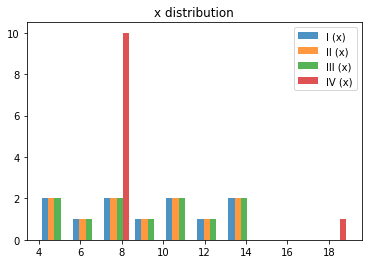

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure()
plt.hist(x=[fourdatasets.x1, fourdatasets.x2, fourdatasets.x3, fourdatasets.x4], 
         alpha=0.8,
        label=["I (x)", "II (x)", "III (x)", "IV (x)"])
plt.title("x distribution")
plt.legend(loc=1)
plt.show()

## Boxplots (using pandas)


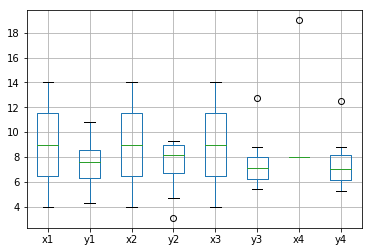

In [21]:
# All boxplots using pandas
fourdatasets.boxplot()

### Exercise: Create a figure with boxplots of x-values by filtering the data frame

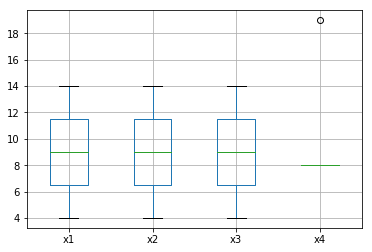

In [29]:
## we select only every other columns
fourdatasets[fourdatasets.columns[::2]].boxplot()      

### Exercise: Create a figure with boxplots of y-values by filtering the data frame

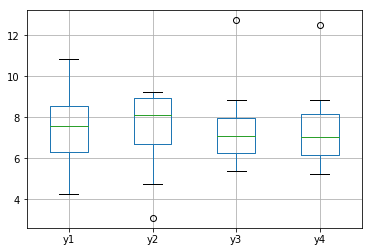

In [30]:
fourdatasets[fourdatasets.columns[1::2]].boxplot()      

## Boxplots (using matplotlib)

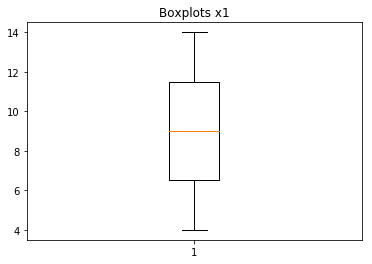

In [26]:
# A single boxplot

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure()                     ## Create the main figure
plt.title('Boxplots x1')         ## Add a title to the (unique) plot in the figure
plt.boxplot(fourdatasets.x1)     ## Create the boxplot
plt.show()                       ## Show the result

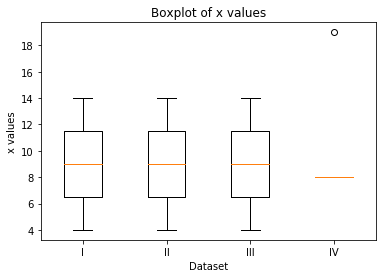

In [27]:
# Multiple boxplots side-by-side

fig = plt.figure()

all_x = [fourdatasets.x1, fourdatasets.x2, fourdatasets.x3, fourdatasets.x4]
names = ['I', 'II', 'III', 'IV']
plt.boxplot(all_x)
plt.xticks([1, 2, 3, 4], names)      ## Replace x ticks with dataset names
plt.xlabel('Dataset')                ## Label the x axis
plt.ylabel('x values')               ## Label the y axis
plt.title('Boxplot of x values')

plt.show()

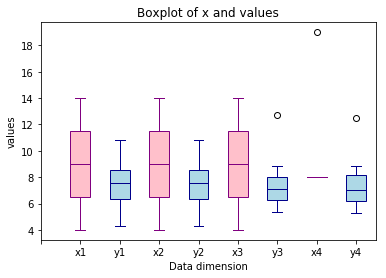

In [54]:
# Multiple boxplots side-by-side
import numpy as np
fig = plt.figure()

all_x = [fourdatasets.x1, fourdatasets.x2, fourdatasets.x3, fourdatasets.x4]
all_y = [fourdatasets.y1, fourdatasets.y1, fourdatasets.y3, fourdatasets.y4]
setname = ['I', 'II', 'III', 'IV']
bp_x = plt.boxplot(all_x, positions=[1,3,5,7], patch_artist=True)
bp_y = plt.boxplot(all_y, positions=[2,4,6,8], patch_artist=True)

## Change the colors
for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp_x[element], color='purple')
    plt.setp(bp_y[element], color='darkblue')
    
for patch in bp_x['boxes']:
    patch.set(facecolor='pink')
    
for patch in bp_y['boxes']:
    patch.set(facecolor='lightblue')

## Add information to the plot
plt.xticks([0,1,2,3,4,5,6,7,8], 
           ['', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4'])    ## Replace x ticks with dataset names
plt.xlabel('Data dimension')       ## Label the x axis
plt.ylabel('values')               ## Label the y axis
plt.title('Boxplot of x and values')

plt.show()

### Anatomy of a boxplot

<img src="img/outliers.png" width="800"></img>

In [81]:
## Calculating median
print(fourdatasets[fourdatasets.columns[::2]].median())
print(fourdatasets[fourdatasets.columns[1::2]].median())

x1    9.0
x2    9.0
x3    9.0
x4    8.0
dtype: float64
y1    7.6
y2    8.1
y3    7.1
y4    7.0
dtype: float64


In [75]:
## Checking manually for outliers

values = fourdatasets.x1

Q1 = values.quantile(0.25)
Q3 = values.quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR
print("Outliers below min:", any(values < min), 
      "\nOutliers above max:", any(values > max))

Outliers below min: False 
Outliers above max: False


## Mean vs. median vs. mode

In [3]:
import seaborn as sns
movies = pd.read_csv("data/50movies-clean.csv")
movies.head()

,Unnamed: 0,box_office,genre,imdb_rating,imdb_votes,title,metascore,year,language,country
0,0,NaN,Drama Mystery Thriller,7.1,21534.0,First Reformed,85.0,2017,English,USA UK Australia
1,1,NaN,Animation Action Adventure Comedy Family Sci-Fi,8.7,43599.0,Spider-Man: Into the Spider-Verse,87.0,2018,English Spanish,USA
2,2,NaN,Biography Drama History,7.5,66076.0,First Man,84.0,2018,English,USA Japan
3,3,NaN,Drama Music Romance,8.1,118052.0,A Star Is Born,88.0,2018,English,USA
4,4,NaN,Drama,8.2,30951.0,Roma,96.0,2018,Spanish English Norwegian Japanese,Mexico USA


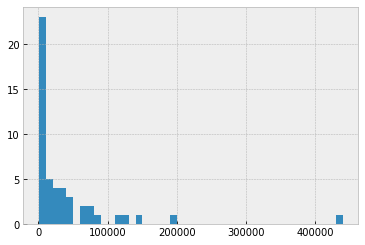

In [28]:
import math
votes = movies['imdb_votes'].astype(float).dropna()
min = math.floor(votes.min())
max = math.ceil(votes.max())
binwidth = 10000

fig = plt.figure()
plt.hist(votes, bins=range(min, max + binwidth, binwidth))
plt.show()

In [30]:
votes.mean()

38588.93877551021

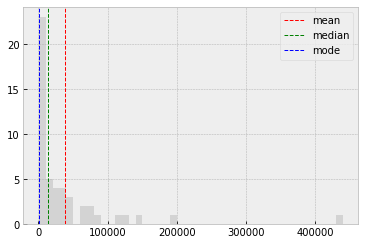

In [36]:
## Plot the frequency distribution, mean, median and mode
from scipy import stats

fig = plt.figure()
plt.hist(votes, color='lightgray', bins=range(min, max + binwidth, binwidth))

## Add vertical lines to idicate the mean, median and mode values:
plt.axvline(votes.mean(), 
            linewidth=1, color='red', linestyle='--', label = "mean") 
plt.axvline(votes.median(), 
            linewidth=1, color='green', linestyle='--', label = "median")
plt.axvline(stats.mode(votes).mode[0], 
            linewidth=1, color='blue', linestyle='--', label = "mode")

## Adding the legend:
plt.legend(loc='upper right')
plt.show()

## Scatterplots

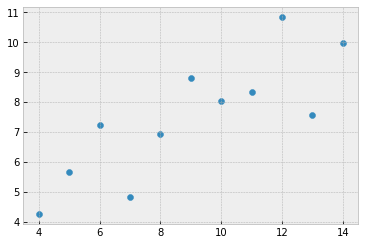

In [15]:
plt.style.use('bmh')

plt.figure()
plt.scatter(fourdatasets.x1, fourdatasets.y1)
plt.show()

Styles: [https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)

<img src="img/pyplotstyle.png" width="400"></img>

## Title, labels

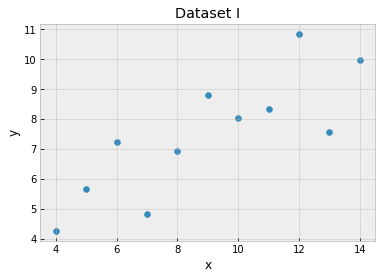

In [16]:
plt.title('Dataset I')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(fourdatasets.x1, fourdatasets.y1)
plt.show()

## Markers

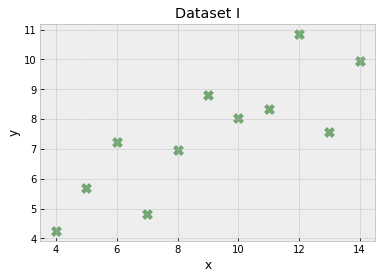

In [17]:
plt.title('Dataset I')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(fourdatasets.x1, fourdatasets.y1, 
            s=100,            # size of individual visual marks, in points 
            marker="X",       # style of the marker
            c="darkgreen",    # color of the mark
            alpha=0.5)        # opacity (0=transparent, 1=opaque)
plt.show()

## Multiple plots (superimposed)

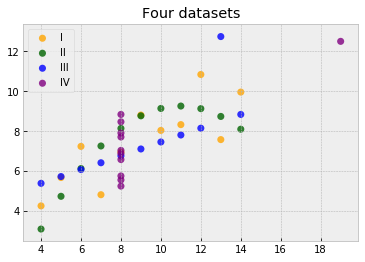

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)       # nrow, ncolumn, index 

ax.scatter(fourdatasets.x1, fourdatasets.y1, 
           alpha=0.8, c="orange", edgecolors='none', s=50, label="I")
ax.scatter(fourdatasets.x2, fourdatasets.y2, 
           alpha=0.8, c="darkgreen", edgecolors='none', s=50, label="II")
ax.scatter(fourdatasets.x3, fourdatasets.y3, 
           alpha=0.8, c="blue", edgecolors='none', s=50, label="III")
ax.scatter(fourdatasets.x4, fourdatasets.y4, 
           alpha=0.8, c="purple", edgecolors='none', s=50, label="IV")

 
plt.title('Four datasets')     # set title for the figure
plt.legend(loc=2)                    # specify the location of the legend 
plt.show()

## Multiple plots (side-by-side)

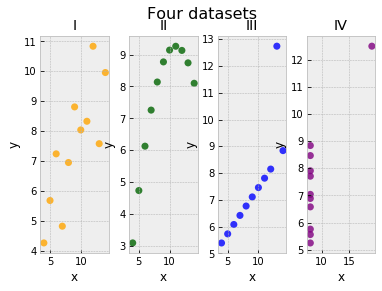

In [19]:
fig = plt.figure()
fig.suptitle("Four datasets", fontsize=16)
fig.subplots_adjust(hspace=0.6, wspace=0.3)

ax1 = fig.add_subplot(1, 4, 1)       
ax1.scatter(fourdatasets.x1, fourdatasets.y1, 
           alpha=0.8, c="orange", edgecolors='none', s=50)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("I")

ax2 = fig.add_subplot(1, 4, 2)
ax2.scatter(fourdatasets.x2, fourdatasets.y2, 
           alpha=0.8, c="darkgreen", edgecolors='none', s=50)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("II")

ax3 = fig.add_subplot(1, 4, 3)
ax3.scatter(fourdatasets.x3, fourdatasets.y3, 
           alpha=0.8, c="blue", edgecolors='none', s=50)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("III")

ax4 = fig.add_subplot(1, 4, 4)
ax4.scatter(fourdatasets.x4, fourdatasets.y4, 
           alpha=0.8, c="purple", edgecolors='none', s=50)
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("IV")

plt.show()

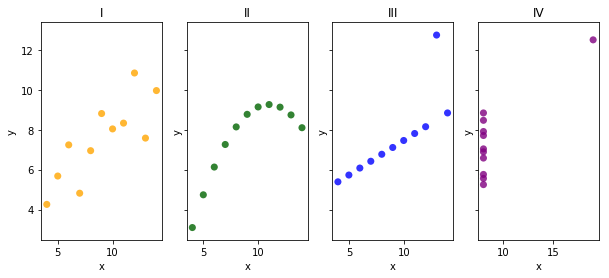

In [31]:
## A more concise version:
fig, axs = plt.subplots(1, 4, figsize=(10, 4), sharey=True)

def addScatter(x, y, setname, color, index):
    axs[index].scatter(x,y,alpha=0.8, c=color, edgecolors='none', s=50)
    axs[index].set_xlabel("x")
    axs[index].set_ylabel("y")
    axs[index].set_title(setname)

addScatter(fourdatasets.x1, fourdatasets.y1, "I", "orange",0)
addScatter(fourdatasets.x2, fourdatasets.y2, "II", "darkgreen",1)
addScatter(fourdatasets.x3, fourdatasets.y3, "III", "blue",2)
addScatter(fourdatasets.x4, fourdatasets.y4, "IV", "purple",3)

## Multiple plots (juxtaposed in a grid)

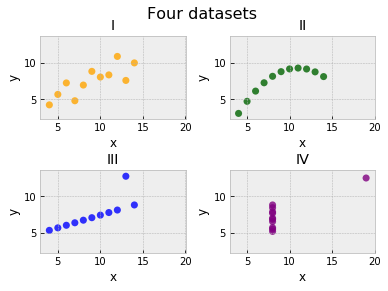

In [24]:
# Multiple plots separated with shared axes

fig = plt.figure()
fig.suptitle("Four datasets", fontsize=16)
fig.subplots_adjust(hspace=0.6, wspace=0.3)       ## add space between plots

ax1 = fig.add_subplot(2, 2, 1)       
ax1.scatter(fourdatasets.x1, fourdatasets.y1, 
           alpha=0.8, c="orange", edgecolors='none', s=50)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("I")

ax2 = fig.add_subplot(2, 2, 2, sharex = ax1, sharey = ax1)
ax2.scatter(fourdatasets.x2, fourdatasets.y2, 
           alpha=0.8, c="darkgreen", edgecolors='none', s=50)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("II")

ax3 = fig.add_subplot(2, 2, 3, sharex = ax1, sharey = ax1)
ax3.scatter(fourdatasets.x3, fourdatasets.y3, 
           alpha=0.8, c="blue", edgecolors='none', s=50)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("III")

ax4 = fig.add_subplot(2, 2, 4,  sharex = ax1, sharey = ax1)
ax4.scatter(fourdatasets.x4, fourdatasets.y4, 
           alpha=0.8, c="purple", edgecolors='none', s=50)
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("IV")

plt.show()

## Importance of layout, ratios and axes

<table>
    <tr>
        <td><img src="img/anscombe2.png" width="300"></img></td>
        <td><img src="img/anscombe3.png" width="300"></img></td>
        <td><img src="img/anscombe1.png" width="300"></img></td>
    </tr>
</table>

## Anscombe's quartet

<img src="img/anscombe_wikipedia.png" width="800"></img>

## Anscombe's quartet and seaborn

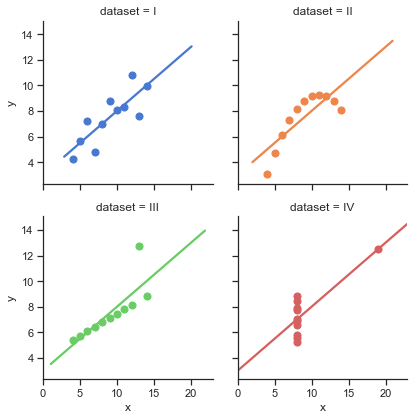

In [89]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=3,
           scatter_kws={"s": 50, "alpha": 1})

## Datasaurus dozen

<img src="img/datasaurus.png" width=600></img>

## Statistical summaries and visualization

<img src="img/boxplots.gif"></img>

<img src="img/BoxViolinSmaller.gif"></img>

## Homework

The datasaurus dozen dataset can be found [here](https://www.autodeskresearch.com/sites/default/files/The%20Datasaurus%20Dozen.zip)

* Create a summary statistic table with the different dataset properties
* Visualize the different datasets as a scatterplot

## Ordinal data

In [40]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.3,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.1,NaN,S


Note:
* Embarked: C = Cherbourg, Q = Queenstown, S = Southampton
* Pclass: 1 = Upper, 2 = Middle, 3 = Lower
* Survived: 0 = No, 1 = Yes
* SibSup: # of siblings / spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic 

## Question: What is the age distribution per class?

<Figure size 432x288 with 0 Axes>

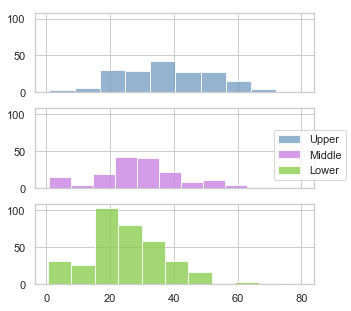

In [131]:
plt.figure()

upper = titanic.loc[titanic['Pclass'] == 1]
middle = titanic.loc[titanic['Pclass'] == 2]
lower = titanic.loc[titanic['Pclass'] == 3]

colors=["#7aa0c4","#ca82e1" ,"#8bcd50"]

fig, axs = plt.subplots(3, 1, figsize=(5, 5), sharey=True, sharex=True)

axs[0].hist(x=upper['Age'].dropna(), alpha=0.8, color=colors[0], label="Upper")
axs[1].hist(x=middle['Age'].dropna(), alpha=0.8, color=colors[1], label="Middle")
axs[2].hist(x=lower['Age'].dropna(), alpha=0.8,  color=colors[2], label="Lower")

fig.legend(loc=7)
plt.show()

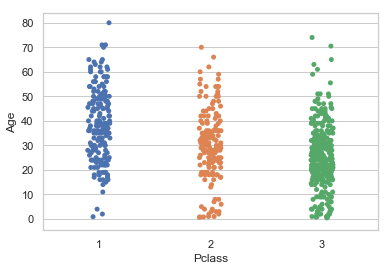

In [132]:
sns.stripplot(x="Pclass", y="Age", data=titanic, jitter=True)
ax.set_xlabel("Class")
ax.set_ylabel("Age")
plt.show()

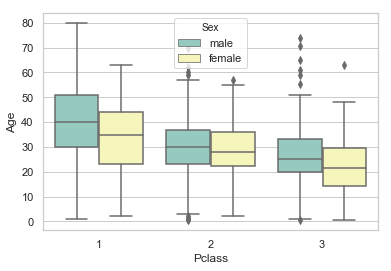

In [130]:
ax = sns.boxplot(x="Pclass", y="Age", hue="Sex",
                 data=titanic, palette="Set3")

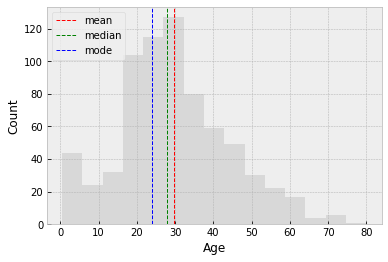

In [59]:
col = 'Age'
numdata = titanic[col]

fig = plt.figure()
ax = numdata.hist(bins=15, color='lightgray', alpha=0.8)
ax.set(xlabel=col, ylabel='Count')

ax.axvline(numdata.mean(), 
            linewidth=1, color='red', linestyle='--', label = "mean") 
ax.axvline(numdata.median(), 
            linewidth=1, color='green', linestyle='--', label = "median")
ax.axvline(stats.mode(numdata).mode[0], 
            linewidth=1, color='blue', linestyle='--', label = "mode")
plt.legend(loc='upper left')

plt.show()

### Exercise: Change the value of `col` to `Pclass` and `Survived` and observe the distributions and statistics

## Categorical data

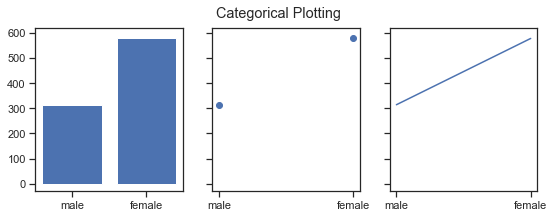

In [90]:
names = titanic['Sex'].unique()
values = titanic['Sex'].groupby(titanic['Sex']).count()

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')
plt.show()

### Exercise: Are these visualizations appropriate?


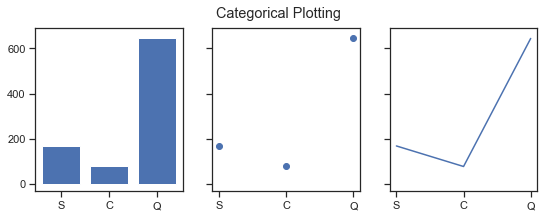

In [91]:
names = titanic['Embarked'].dropna().unique()
values = titanic['Embarked'].dropna().groupby(titanic['Embarked']).count()

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')
plt.show()

## Question: What is the survival probability by class and gender?

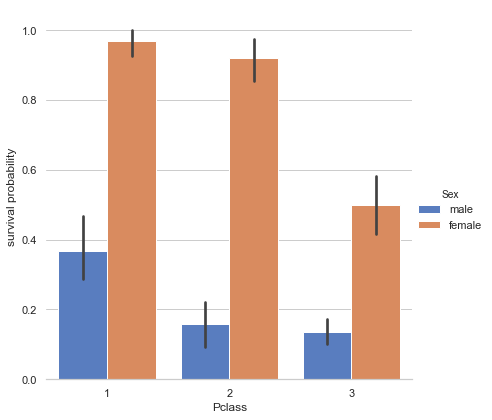

In [92]:
import seaborn as sns
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")